In [31]:
# 3 = Name
# 5 = Roster Position
# 6 = Salary
# 9 = Expected Points
#pg sg sf pf c g f util

playerList = readcsv("DKsalaries2.csv")

numPlayers = trunc(Int,(length(playerList)/9))
optimalroster = 0;
using JuMP, Mosek

m = Model(solver=MosekSolver(LOG=0))

@variable(m, players[2:numPlayers], Int)
@variable(m, pg[2:numPlayers], Bin)
@variable(m, sg[2:numPlayers], Bin)
@variable(m, sf[2:numPlayers], Bin)
@variable(m, pf[2:numPlayers], Bin)
@variable(m, c[2:numPlayers], Bin)
@variable(m, f[2:numPlayers], Bin)
@variable(m, g[2:numPlayers], Bin)
@variable(m, util[2:numPlayers], Bin)

@constraint(m, sum(players[i]  for i in 2:numPlayers) <= 8)

    
    for i in 2:numPlayers
        
        @constraint(m,players[i] <= 1) 
        
        if contains(playerList[i,5],"PG")
            @constraint(m,pg[i] <= 1)
        else
            @constraint(m,pg[i] == 0)
        end
        if contains(playerList[i,5],"SG")
            @constraint(m,sg[i] <= 1)
        else
           @constraint(m,sg[i] == 0)
        end
        if contains(playerList[i,5],"SF")
            @constraint(m,sf[i] <= 1)
        else
            @constraint(m,sf[i] == 0)
        end
        if contains(playerList[i,5],"PF")
            @constraint(m,pf[i] <= 1)
        else
            @constraint(m,pf[i] == 0)
        end
         if contains(playerList[i,5],"C")
            @constraint(m,c[i] <= 1)
        else
            @constraint(m,c[i] == 0)
        end       
        if contains(playerList[i,5],"G")
            @constraint(m,g[i] <= 1)
        else
            @constraint(m,g[i] == 0)
        end
        if contains(playerList[i,5],"F")
            @constraint(m,f[i] <= 1)
        else
            @constraint(m,f[i] == 0)
        end
        if contains(playerList[i,5],"UTIL")
            @constraint(m,util[i] <= 1)
        else
            @constraint(m,util[i] == 0)
        end

    end  

    @constraint(m, sum(players[i]*playerList[i,6] for i in 2:numPlayers) <= 50000)
    
    for i in 2:numPlayers
            @constraint(m, pg[i] + sg[i] + sf[i] +g[i]+ pf[i] + c[i] + f[i] + util[i] - players[i] == 0)
    end
    
    @constraint(m, sum(pg[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sg[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sf[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(pf[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(c[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(g[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(f[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(util[i] for i in 2:numPlayers) <= 1 )
    

    
    @objective(m, Max, sum(players[i] * playerList[i,9] for i in 2:92))
    
        
        solve(m)
println("Expected Points ", getobjectivevalue(m))
                                    
optimalRoster = getobjectivevalue(m)
                                            
p = getvalue(players)
pg = getvalue(pg)
sg = getvalue(sg)
sf = getvalue(sf)
pf = getvalue(pf)
g = getvalue(g)
f = getvalue(f)
c = getvalue(c)
util = getvalue(util)
           # println(getvalue(f))
for i in 2:numPlayers 
    if trunc(p[i]) > 0 && pg[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PG")
    end
    if trunc(p[i]) > 0 && sg[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SG")
    end
    if trunc(p[i]) > 0 && sf[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SF")
    end
    if trunc(p[i]) > 0 && pf[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PF")
    end
                                                if trunc(p[i]) > 0 && g[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " G")
    end
    if trunc(p[i]) > 0 && f[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " F")
    end
    if trunc(p[i]) > 0 && c[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " C")
    end
    if trunc(p[i]) > 0 && util[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " UTIL")
    end
end
                                            
                                            println(optimalRoster)
                                            println(p)

Expected Points 267.4100000000003
Anthony Davis 10900 54.06 PF
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34.42 SG
Robert Covington 5600 28.13 F
Hassan Whiteside 5400 33.77 UTIL
Pau Gasol 4500 27.1 C
Kyle Anderson 4000 22.58 SF
Tyler Johnson 3900 22.1 G
267.4100000000003
players: 1 dimensions:
[ 2] = 1.0
[ 3] = 0.0
[ 4] = 0.0
[ 5] = 0.0
[ 6] = 1.0
[ 7] = 0.0
[ 8] = -0.0
[ 9] = 0.0
[10] = 0.0
[11] = 0.0
[12] = 1.0000000000000042
[13] = 0.0
[14] = 0.0
[15] = 0.0
[16] = 0.0
[17] = 0.0
[18] = 0.0
[19] = 1.000000000000006
[20] = 0.0
[21] = 0.0
[22] = 1.0
[23] = 0.0
[24] = -0.0
[25] = 0.0
[26] = 0.0
[27] = 0.0
[28] = 0.0
[29] = 0.0
[30] = 1.0
[31] = 0.0
[32] = 0.0
[33] = 0.0
[34] = 0.0
[35] = 0.0
[36] = 1.0
[37] = 0.0
[38] = 1.0
[39] = 0.0
[40] = 0.0
[41] = 0.0
[42] = 0.0
[43] = 0.0
[44] = 0.0
[45] = 0.0
[46] = 0.0
[47] = 0.0
[48] = 0.0
[49] = 0.0
[50] = 0.0
[51] = 0.0
[52] = 0.0
[53] = 0.0
[54] = 0.0
[55] = 0.0
[56] = 0.0
[57] = 0.0
[58] = 0.0
[59] = 0.0
[60] = 0.0
[61] = 0.0
[62] = 0.0


Anthony Davis 10900 54.06 F
Kevin Durant 10300 48.12 SF
Damian Lillard 8900 45.25 PG
Jrue Holiday 7900 38.03 PG
CJ McCollum 6700 34.42 SG
Hassan Whiteside 5400 33.77 UTIL
Pau Gasol 4500 27.1 C
Bam Adebayo 3200 17.51 PF

In [2]:
# 3 = Name
# 5 = Roster Position
# 6 = Salary
# 9 = Expected Points
#pg sg sf pf c g uftil

playerList = readcsv("DKsalaries2.csv")
println(playerList[1])

numPlayers = trunc(Int,(length(playerList)/9))

numRosters = 3
using JuMP, Mosek, Ipopt, Gurobi,Cbc#, AmplNLWriter

m = Model(solver=CbcSolver())
#m = Model(solver=GurobiSolver(OutputFlag=0))
#m = Model(solver=MosekSolver(LOG=0))
#m = Model(solver = IpoptSolver(print_level=0))
#m = Model(solver = CouenneNLSolver())
#m = Model(solver = BonminNLSolver())
#m = Model(solver = AmplNLSolver(CoinOptServices.bonmin))

@variable(m, 0<= players[2:numPlayers,1:numRosters]<=1, Int)
@variable(m, pg[2:numPlayers,1:numRosters], Bin)
@variable(m, sg[2:numPlayers,1:numRosters], Bin)
@variable(m, sf[2:numPlayers,1:numRosters], Bin)
@variable(m, pf[2:numPlayers,1:numRosters], Bin)
@variable(m, c[2:numPlayers,1:numRosters], Bin)
@variable(m, f[2:numPlayers,1:numRosters], Bin)
@variable(m, g[2:numPlayers,1:numRosters], Bin)
@variable(m, util[2:numPlayers,1:numRosters], Bin)
@variable(m, totalPoints >= 0)
@variable(m, rosterPoints[1:numRosters] >= 0)

for j in 1:numRosters
    @constraint(m, sum(players[i,j]  for i in 2:numPlayers) <= 8)
end
    
    for j in 1:numRosters    
    for i in 2:numPlayers
        if contains(playerList[i,5],"PG")
            @constraint(m,pg[i,j] <= 1)
        else
            @constraint(m,pg[i,j] == 0)
        end
        if contains(playerList[i,5],"SG")
            @constraint(m,sg[i,j] <= 1)
        else
           @constraint(m,sg[i,j] == 0)
        end
        if contains(playerList[i,5],"SF")
            @constraint(m,sf[i,j] <= 1)
        else
            @constraint(m,sf[i,j] == 0)
        end
        if contains(playerList[i,5],"PF")
            @constraint(m,pf[i,j] <= 1)
        else
            @constraint(m,pf[i,j] == 0)
        end
         if contains(playerList[i,5],"C")
            @constraint(m,c[i,j] <= 1)
        else
            @constraint(m,c[i,j] == 0)
        end       
        if contains(playerList[i,5],"G")
            @constraint(m,g[i,j] <= 1)
        else
            @constraint(m,g[i,j] == 0)
        end
        if contains(playerList[i,5],"F")
            @constraint(m,f[i,j] <= 1)
        else
            @constraint(m,f[i,j] == 0)
        end
        if contains(playerList[i,5],"UTIL")
            @constraint(m,util[i,j] <= 1)
        else
            @constraint(m,util[i,j] == 0)
        end

    end  
    end
for j in 1:numRosters
    @constraint(m, sum( players[i,j] * playerList[i,6]  for i in 2:numPlayers) <= 50000)
end
        
for j in 1:numRosters   
    for i in 2:numPlayers
        @constraint(m, pg[i,j] + sg[i,j] + sf[i,j] + pf[i,j] + c[i,j] + f[i,j] + util[i,j] - players[i,j] == 0)
    end
end
    
    for j in 1:numRosters
    @constraint(m, sum(pg[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sg[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sf[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(pf[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(c[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(f[i,j] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(util[i,j] for i in 2:numPlayers) <= 1 )
    end

   
       
for i in 1:numRosters
    @constraint(m,rosterPoints[i] - sum(players[j,i] * playerList[j,9] for j in 2:92) <= 0)
    @constraint(m,rosterPoints[i] - sum(players[j,i] * playerList[j,9] for j in 2:92) >= 0)
        end
    for i in 2:numRosters
        @constraint(m, rosterPoints[i - 1] - rosterPoints[i] - .01 >= 0 )
        #@constraint(m, rosterPoints[i - 1] - rosterPoints[i] - .01 <= 0 )
    end
                        
@objective(m,Max,sum(rosterPoints))

solve(m)

rosterPoints = getvalue(rosterPoints)

p = getvalue(players)
pg = getvalue(pg)
sg = getvalue(sg)
sf = getvalue(sf)
pf = getvalue(pf)
g = getvalue(g)
f = getvalue(f)
c = getvalue(c)
util = getvalue(util)
    
for j in 1:numRosters 
    println("Expected Points: ",rosterPoints[j])
                                            
for i in 2:numPlayers
    if p[i,j] > .1 && pg[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PG")
    end
    if p[i,j] > .1 && sg[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SG")
    end
    if p[i,j] > .1 && sf[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SF")
    end
    if p[i,j] > .1 && pf[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PF")
    end
    if p[i,j] > .1 && g[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " G")
    end
    if p[i,j] > .1 && f[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " F")
    end
    if p[i,j] > .1 && c[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " C")
    end
    if p[i,j] > .1 && util[i,j] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " UTIL")
    end
                                                 
end
                                                println()
                                                println()
end


Position
Expected Points: 260.23
Anthony Davis 10900 54.06 PF
Kevin Durant 10300 48.12 SF
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34.42 SG
Hassan Whiteside 5400 33.77 UTIL
Pau Gasol 4500 27.1 C
Bam Adebayo 3200 17.51 F


Expected Points: 259.31999999999994
Anthony Davis 10900 54.06 F
Damian Lillard 8900 45.25 PG
Draymond Green 7500 36.59 PF
CJ McCollum 6700 34.42 SG
Robert Covington 5600 28.13 SF
Hassan Whiteside 5400 33.77 UTIL
Pau Gasol 4500 27.1 C


Expected Points: 259.17
Anthony Davis 10900 54.06 F
Kevin Durant 10300 48.12 SF
Damian Lillard 8900 45.25 PG
CJ McCollum 6700 34.42 SG
Hassan Whiteside 5400 33.77 UTIL
Pau Gasol 4500 27.1 C
David West 3300 16.45 PF




In [3]:
playerList = readcsv("DKsalaries2.csv")

numPlayers = trunc(Int,(length(playerList)/9))
optimalRoster = 267.41;
values = zeros(100)
using JuMP, Mosek


for number in 1:10

m = Model(solver=MosekSolver(LOG=0))

@variable(m, players[2:numPlayers], Bin)
@variable(m, pg[2:numPlayers], Bin)
@variable(m, sg[2:numPlayers], Bin)
@variable(m, sf[2:numPlayers], Bin)
@variable(m, pf[2:numPlayers], Bin)
@variable(m, c[2:numPlayers], Bin)
@variable(m, f[2:numPlayers], Bin)
@variable(m, g[2:numPlayers], Bin)
@variable(m, util[2:numPlayers], Bin)

@constraint(m, sum(players[i]  for i in 2:numPlayers) <= 8)
    
    for i in 2:numPlayers
        if contains(playerList[i,5],"PG")
            @constraint(m,pg[i] <= 1)
        else
            @constraint(m,pg[i] == 0)
        end
        if contains(playerList[i,5],"SG")
            @constraint(m,sg[i] <= 1)
        else
           @constraint(m,sg[i] == 0)
        end
        if contains(playerList[i,5],"SF")
            @constraint(m,sf[i] <= 1)
        else
            @constraint(m,sf[i] == 0)
        end
        if contains(playerList[i,5],"PF")
            @constraint(m,pf[i] <= 1)
        else
            @constraint(m,pf[i] == 0)
        end
         if contains(playerList[i,5],"C")
            @constraint(m,c[i] <= 1)
        else
            @constraint(m,c[i] == 0)
        end       
        if contains(playerList[i,5],"G")
            @constraint(m,g[i] <= 1)
        else
            @constraint(m,g[i] == 0)
        end
        if contains(playerList[i,5],"F")
            @constraint(m,f[i] <= 1)
        else
            @constraint(m,f[i] == 0)
        end
        if contains(playerList[i,5],"UTIL")
            @constraint(m,util[i] <= 1)
        else
            @constraint(m,util[i] == 0)
        end

    end  

    @constraint(m, sum(players[i]*playerList[i,6] for i in 2:numPlayers) <= 50000)
    
    for i in 2:numPlayers
                @constraint(m, pg[i] + sg[i] + sf[i] + pf[i] + c[i]+ g[i] + f[i] + util[i] - players[i] == 0)
    end
    
    @constraint(m, sum(pg[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sg[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(sf[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(pf[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(c[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(g[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(f[i] for i in 2:numPlayers) <= 1 )
    @constraint(m, sum(util[i] for i in 2:numPlayers) <= 1 )
    
    @constraint(m,sum(players[i] * playerList[i,9] for i in 2:92) <= optimalRoster -.001)
    
    @objective(m, Max, sum(players[i] * playerList[i,9] for i in 2:92))
    
        
        solve(m)
    println("Expected Points For Roster ",number,": ", getobjectivevalue(m))
                                                              
optimalRoster = getobjectivevalue(m)
                                                    values[number] = optimalRoster
                              
p = getvalue(players)
pg = getvalue(pg)
sg = getvalue(sg)
sf = getvalue(sf)
pf = getvalue(pf)
g = getvalue(g)
f = getvalue(f)
c = getvalue(c)
util = getvalue(util)
                                                println(sum(p[i]*playerList[i,6] for i in 2:numPlayers))
           # println(getvalue(f))
for i in 2:numPlayers 
    if p[i] > .1 && pg[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PG")
    end
    if p[i] > .1 && sg[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SG")
    end
    if p[i] > .1 && sf[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " SF")
    end
    if p[i] > .1 && pf[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " PF")
    end
    if p[i] > .1 && g[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " G")
    end
    if p[i] > .1 && f[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " F")
    end
    if p[i] > .1 && c[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " C")
    end
    if p[i] > .1 && util[i] > .1
        println(playerList[i,3], " ", playerList[i,6], " ",playerList[i,9], " UTIL")
    end
end
                                                    println()                                       
                                            end

Expected Points For Roster 1: 266.55
Expected Points For Roster 2: 265.92
Expected Points For Roster 3: 265.88000000000005
Expected Points For Roster 4: 265.58
Expected Points For Roster 5: 265.54
Expected Points For Roster 6: 265.35
Expected Points For Roster 7: 265.20000000000005
Expected Points For Roster 8: 265.06
Expected Points For Roster 9: 265.02000000000004
Expected Points For Roster 10: 265.0
Expected Points For Roster 11: 264.94
Expected Points For Roster 12: 264.92
Expected Points For Roster 13: 264.89000000000004
Expected Points For Roster 14: 264.82
Expected Points For Roster 15: 264.79
Expected Points For Roster 16: 264.74
Expected Points For Roster 17: 264.72
Expected Points For Roster 18: 264.64
Expected Points For Roster 19: 264.61
Expected Points For Roster 20: 264.54
Expected Points For Roster 21: 264.49
Expected Points For Roster 22: 264.47
Expected Points For Roster 23: 264.46
Expected Points For Roster 24: 264.31
Expected Points For Roster 25: 264.23
Expected Poi

3 7.53
4 12.9
5 20.53
6 29.230000000000004
7 36.2
8 41.650000000000006
9 48.06
10 54.6
11 60.88000000000001
12 66.93
13 72.89
14 78.8000000000001
15 85.11
16 91.18
17 96.94
18 102.78
19 108.69000000000001
20 114.61000000000001
21 119.99000000000001
22 125.44
23 131.49
24 137.19
25 142.26
26 147.65
27 153.6
28 158.8
29 164.05
30 169.29000000000002
31 174.89000000000001
32 179.94
33 184.8
34 189.86
35 194.78
36 199.52000000000012
37 204.42999999999998
38 209.42000000000002
39 214.08000000000004
40 218.55
41 223.31000000000003
42 228.11
43 232.82999999999998
44 237.64000000000001
45 241.85
46 246.40000000000003
47 250.94000000000005
48 255.61
49 260.13
50 264.61
51 268.58
52 272.64000000000004
53 276.52
54 280.82
55 284.85
56 289.02
57 292.43000000000006
58 296.51
59 300.57000000000005
60 304.0
61 307.39
62 310.59000000000003
63 314.12
64 316.88
65 319.31
66 322.14000000000004
67 325.34
68 327.09000000000003
69 328.58000000000004
70 330.45000000000005
71 332.1
72 333.26000000000005
73 333

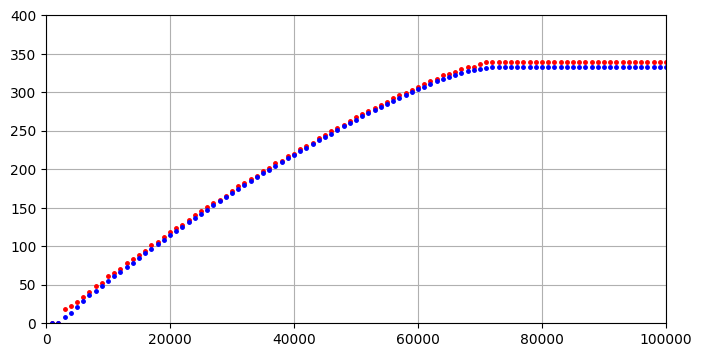

 333.45000000000005


In [3]:
# 3 = Name
# 5 = Roster Position
# 6 = Salary
# 9 = Expected Points
#pg sg sf pf c g uftil
numPerSalary = 20
salaryIncrements = 100
using JuMP, Gurobi,PyPlot, Mosek
result = zeros(salaryIncrements) #[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
result2 = zeros(salaryIncrements)
cap = collect(1000:1000:100000) #[10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]

for z in 3:salaryIncrements
    optimalRoster = 1000
    playerList = readcsv("DKsalaries2.csv")
    numPlayers = trunc(Int,(length(playerList)/9))
    #m = Model(solver=GurobiSolver(OutputFlag=0))
    
    for number in 1:numPerSalary
    m = Model(solver=MosekSolver(LOG=0))
    @variable(m, players[2:numPlayers], Bin)
    @variable(m, pg[2:numPlayers], Bin)
    @variable(m, sg[2:numPlayers], Bin)
    @variable(m, sf[2:numPlayers], Bin)
    @variable(m, pf[2:numPlayers], Bin)
    @variable(m, c[2:numPlayers], Bin)
    @variable(m, f[2:numPlayers], Bin)
    @variable(m, g[2:numPlayers], Bin)
    @variable(m, util[2:numPlayers], Bin)
    @constraint(m, sum(players[i]  for i in 2:numPlayers) <= 8)
        for i in 2:numPlayers
            if contains(playerList[i,5],"PG")
                @constraint(m,pg[i] <= 1)
            else
                @constraint(m,pg[i] == 0)
            end
            if contains(playerList[i,5],"SG")
                @constraint(m,sg[i] <= 1)
            else
               @constraint(m,sg[i] == 0)
            end
            if contains(playerList[i,5],"SF")
                @constraint(m,sf[i] <= 1)
            else
                @constraint(m,sf[i] == 0)
            end
            if contains(playerList[i,5],"PF")
                @constraint(m,pf[i] <= 1)
            else
                @constraint(m,pf[i] == 0)
            end
             if contains(playerList[i,5],"C")
                @constraint(m,c[i] <= 1)
            else
                @constraint(m,c[i] == 0)
            end       
            if contains(playerList[i,5],"G")
                @constraint(m,g[i] <= 1)
            else
                @constraint(m,g[i] == 0)
            end
            if contains(playerList[i,5],"F")
                @constraint(m,f[i] <= 1)
            else
                @constraint(m,f[i] == 0)
            end
            if contains(playerList[i,5],"UTIL")
                @constraint(m,util[i] <= 1)
            else
                @constraint(m,util[i] == 0)
            end
        end  
        @constraint(m, sum(players[i]*playerList[i,6] for i in 2:numPlayers) <= cap[z])
        for i in 2:numPlayers
                @constraint(m, pg[i] + sg[i] + sf[i]+g[i] + pf[i] + c[i] + f[i] + util[i] - players[i] == 0)
        end
        @constraint(m, sum(pg[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(sg[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(sf[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(pf[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(c[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(f[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(g[i] for i in 2:numPlayers) <= 1 )
        @constraint(m, sum(util[i] for i in 2:numPlayers) <= 1 )
        
        @constraint(m,sum(players[i] * playerList[i,9] for i in 2:92) <= optimalRoster -.001)

        @objective(m, Max, sum(players[i] * playerList[i,9] for i in 2:92))
    #    @constraint(m, players[i])
            solve(m);
           val = getobjectivevalue(m)
                                                        if number == 1
                                                        result[z]= val
                                                        end
                                                        if number == numPerSalary
                                                            result2[z] = val
                                                        end
                                                        optimalRoster = val
end

                                                    println(z, " ", optimalRoster)
end
  
    for i in 1:10:100
   #     println("Cash to spend: ",cap[i]," Max points: ", result[i])
    end
 
#k=10
#npts = 100
#xfine = linspace(0,10000,npts)
#ffine = ones(npts)
#for j = 1:k
#    ffine = [ffine.*xfine ones(npts)]
#end
#yfine = ffine * result
figure(figsize=(8,4))
plot(cap,result,"r.", markersize=5)
plot(cap,result2,"b.", markersize=5)
#plot( xfine, yfine, "b-")
axis([0,100000,0,400])
grid("on")



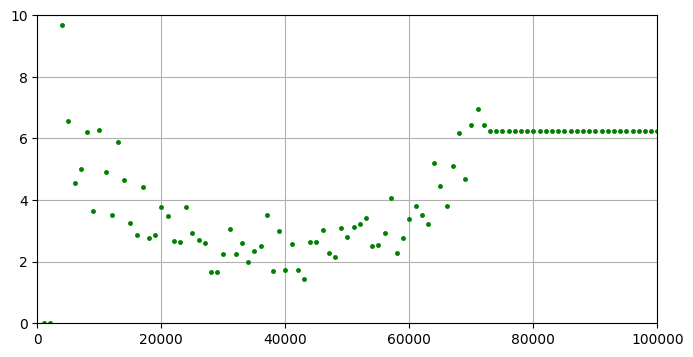

[0.0, 0.0, 10.39, 9.68, 6.57, 4.54, 5.0, 6.22, 3.63, 6.27, 4.91, 3.52, 5.9, 4.65, 3.26, 2.85, 4.43, 2.77, 2.85, 3.79, 3.48, 2.68, 2.63, 3.79, 2.93, 2.72, 2.62, 1.66, 1.65, 2.24, 3.05, 2.24, 2.62, 1.99, 2.34, 2.52, 3.52, 1.69, 3.0, 1.72, 2.58, 1.74, 1.43, 2.65, 2.65, 3.02, 2.28, 2.16, 3.1, 2.8, 3.11, 3.23, 3.41, 2.52, 2.55, 2.92, 4.06, 2.28, 2.76, 3.39, 3.82, 3.52, 3.22, 5.22, 4.46, 3.8, 5.11, 6.17, 4.68, 6.43, 6.95, 6.44, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25, 6.25]
6.440000000001419
[10.39, 9.68, 6.57, 4.54, 5.0, 6.22, 3.63, 6.27, 4.91, 3.52, 5.9, 4.65, 3.26, 2.85, 4.43, 2.77, 2.85, 3.79, 3.48, 2.68, 2.63, 3.79, 2.93, 2.72, 2.62, 1.66, 1.65, 2.24, 3.05, 2.24, 2.62, 1.99, 2.34, 2.52, 3.52, 1.69, 3.0, 1.72, 2.58, 1.74, 1.43, 2.65, 2.65, 3.02, 2.28, 2.16, 3.1, 2.8, 3.11, 3.23, 3.41, 2.52, 2.55, 2.92, 4.06, 2.28, 2.76, 3.39, 3.82, 3.52, 3.22, 5.22, 4.46, 3.8, 5.11, 6.

In [57]:
result3 = zeros(100)
for i in 3:100
    result3[i] = result[i]-result2[i]
end

figure(figsize=(8,4))
plot(cap,result3,"g.", markersize=5)

axis([0,100000,0,10])
grid("on")
println(result3)
println(result3[72])
println(result3[3:72])

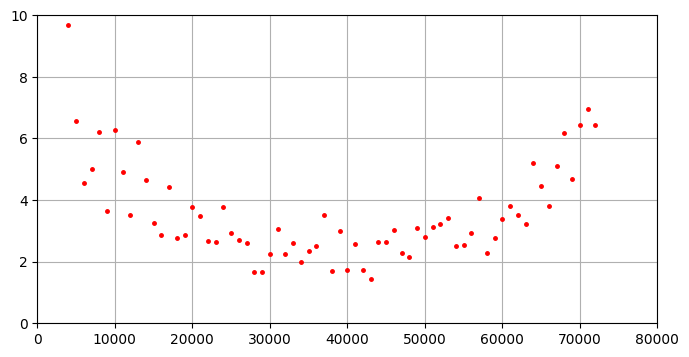

In [60]:
points = result3[3:72]
y = points
x = collect(3000:1000:72000)
using PyPlot
figure(figsize=(8,4))
plot(x,y,"r.", markersize=5)
axis([0,80000,0,10])
grid("on")

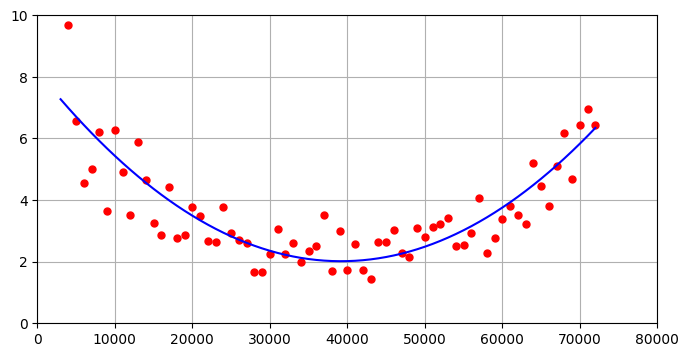

MOSEK warning 57: A large value of -8.8e+11 has been specified in cx for variable '' (0).
55.1969743665386
[4.01722e-9, -0.000314798, 8.18258]


In [63]:
m = Model(solver=MosekSolver(LOG=0))
#m = Model(solver=GurobiSolver(OutputFlag=0))
#m = Model(solver=GurobiSolver(OutputFlag=1,NumericFocus=2))    # extra option to do extra numerical conditioning
#m = Model(solver=GurobiSolver(OutputFlag=1,BarHomogeneous=1))  # extra option to use alternative algorithms

@variable(m, u[1:3])
#@constraint(m, u[1] == 0)

@objective(m, Min, sum(  ((y[i] - (u[1]*(x[i]^2) + u[2]*x[i] + u[3]))^2) for i in 1:69)  )

status = solve(m)

uopt = getvalue(u)
#yopt = getvalue(y)

using PyPlot
npts = 70
    newx = x #linspace(0,10,npts)
newy = ones(npts)
#ffine = ones(npts)
for i in 1:npts
        newy[i] = uopt[1]*x[i]^2+uopt[2]*x[i] + uopt[3] #uopt[1]*newx[i]^2 + uopt[2]*newx[2] + uopt[3]
    end

figure(figsize=(8,4))
plot( x, y, "r.", markersize=10)
plot( newx, newy, "b-")
axis([0,80000,0,10])
grid()
println(getobjectivevalue(m))

println(getvalue(u))


[17.92, 22.58, 27.1, 33.77, 41.2, 47.87, 51.69, 60.87, 65.79, 70.45, 78.79, 83.45, 88.37, 94.03, 101.37, 105.55, 111.54, 118.4, 123.47, 128.12, 134.12, 140.98, 145.19, 150.37, 156.22, 160.46, 165.7, 171.53, 177.94, 182.18, 187.42, 191.85, 197.12, 202.04, 207.95, 211.11, 217.08, 220.27, 225.89, 229.85, 234.26, 240.29, 244.5, 249.42, 253.22, 257.77, 263.23, 267.41, 271.69, 275.87, 279.93, 283.34, 287.4, 291.94, 296.49, 298.79, 303.33, 307.39, 311.21, 314.11, 317.34, 322.1, 323.77, 325.94, 330.45, 333.26, 333.26, 336.88, 339.05]


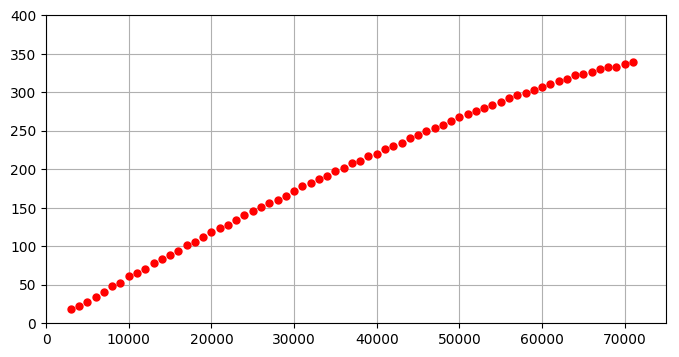

[3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000]
69


In [7]:
points = result[3:71]
y = points
x = collect(3000:1000:71000)
println(y)
println(x)
println(length(y))
using PyPlot
figure(figsize=(8,4))
plot(x,y,"r.", markersize=10)
axis([0,75000,0,400])
grid("on")

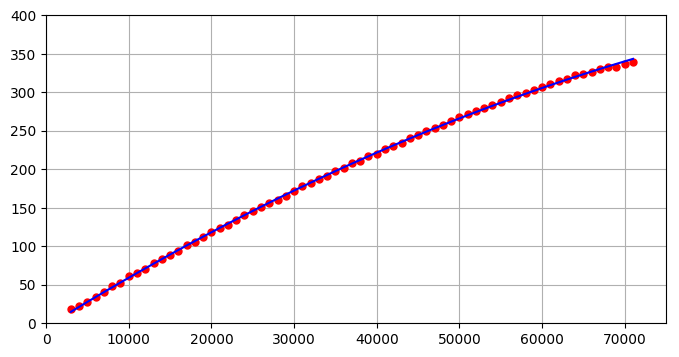

MOSEK warning 57: A large value of -6.7e+13 has been specified in cx for variable '' (0).
MOSEK warning 57: A large value of -1.3e+09 has been specified in cx for variable '' (1).
124.33504934795201
[-2.44474e-8, 0.00663999, -4.81459]


In [47]:
ENV["GRB_LICENSE_FILE"] = "/Users/BrendonLapp/Library/gurobi.lic"
m = Model(solver=MosekSolver(LOG=0))
#m = Model(solver=GurobiSolver(OutputFlag=0))
#m = Model(solver=GurobiSolver(OutputFlag=1,NumericFocus=2))    # extra option to do extra numerical conditioning
#m = Model(solver=GurobiSolver(OutputFlag=1,BarHomogeneous=1))  # extra option to use alternative algorithms

@variable(m, u[1:3])
#@constraint(m, u[1] == 0)

@objective(m, Min, sum(  ((y[i] - (u[1]*(x[i]^2) + u[2]*x[i] + u[3]))^2) for i in 1:69)  )

status = solve(m)

uopt = getvalue(u)
#yopt = getvalue(y)

using PyPlot
npts = 69
    newx = x #linspace(0,10,npts)
newy = ones(npts)
#ffine = ones(npts)
for i in 1:npts
        newy[i] = uopt[1]*x[i]^2+uopt[2]*x[i] + uopt[3] #uopt[1]*newx[i]^2 + uopt[2]*newx[2] + uopt[3]
    end

figure(figsize=(8,4))
plot( x, y, "r.", markersize=10)
plot( newx, newy, "b-")
axis([0,75000,0,400])
grid()
println(getobjectivevalue(m))

println(getvalue(u))

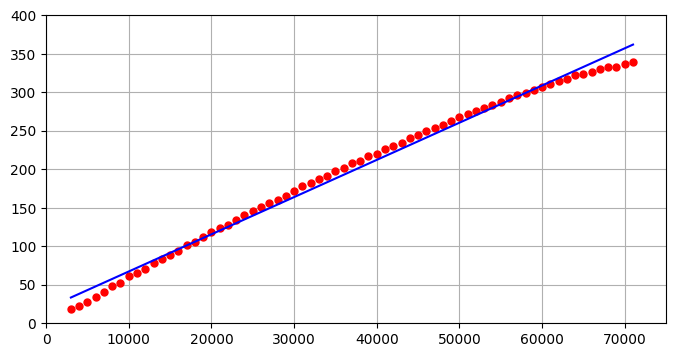

MOSEK warning 57: A large value of -6.7e+13 has been specified in cx for variable '' (0).
MOSEK warning 57: A large value of -1.3e+09 has been specified in cx for variable '' (1).
5312.127386028878
[-0.0, 0.00483088, 18.9564]


In [48]:
ENV["GRB_LICENSE_FILE"] = "/Users/BrendonLapp/Library/gurobi.lic"
m = Model(solver=MosekSolver(LOG=0))
#m = Model(solver=GurobiSolver(OutputFlag=0))
#m = Model(solver=GurobiSolver(OutputFlag=1,NumericFocus=2))    # extra option to do extra numerical conditioning
#m = Model(solver=GurobiSolver(OutputFlag=1,BarHomogeneous=1))  # extra option to use alternative algorithms

@variable(m, u[1:3])
@constraint(m, u[1] == 0)

@objective(m, Min, sum(  ((y[i] - (u[1]*(x[i]^2) + u[2]*x[i] + u[3]))^2) for i in 1:69)  )

status = solve(m)

uopt = getvalue(u)
#yopt = getvalue(y)

using PyPlot
npts = 69
    newx = x #linspace(0,10,npts)
newy = ones(npts)
#ffine = ones(npts)
for i in 1:npts
        newy[i] = uopt[1]*x[i]^2+uopt[2]*x[i] + uopt[3] #uopt[1]*newx[i]^2 + uopt[2]*newx[2] + uopt[3]
    end

figure(figsize=(8,4))
plot( x, y, "r.", markersize=10)
plot( newx, newy, "b-")
axis([0,75000,0,400])
grid()
println(getobjectivevalue(m))

println(getvalue(u))


In [64]:
using JuMP, ECOS, SCS

#m = Model(solver=ECOSSolver(verbose=false))
m = Model(solver=SCSSolver(verbose=false))

@variable(m, u[1:k+1])
@variable(m, t)
@constraint(m, norm(y - A*u) <= t)
@objective(m, Min, t)

status = solve(m)
uopt = getvalue(u)
println(status)
println(uopt)

Optimal
[0.00483081, 18.9598]
